# Principal Component Analysis (PCA) + Decision tree Lab - Wine Quality Dataset

## Introduction
In this lab, we'll explore Principal Component Analysis (PCA) using the Wine Quality dataset. This dataset contains various chemical properties of wines and their quality ratings, making it an excellent example for dimensionality reduction and feature analysis.

### Learning Objectives
- Apply PCA to a real-world dataset with multiple features
- Understand data preprocessing steps for PCA
- Determine the optimal number of principal components
- Visualize and interpret PCA results
- Compare model performance before and after PCA

## Task 1: Setup and Data Loading
First, let's import the necessary libraries and load the Wine Quality dataset.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report

# Set random seed for reproducibility
np.random.seed(42)

# Load the Wine Quality dataset
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

# Display the first few rows and basic information about the dataset
print("Dataset Shape:", wine_data.shape)
print("\nFirst few rows of the dataset:")
wine_data.head()

Dataset Shape: (1599, 12)

First few rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
print("\nDataset Information:")
print(wine_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [16]:
# 1. Create binary classification
wine_data['quality_binary'] = (wine_data['quality'] >= 6).astype(int)

# 2. Separate features and target
X = wine_data.drop(['quality', 'quality_binary'], axis=1)
y = wine_data['quality_binary']

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Number of components selected: 9


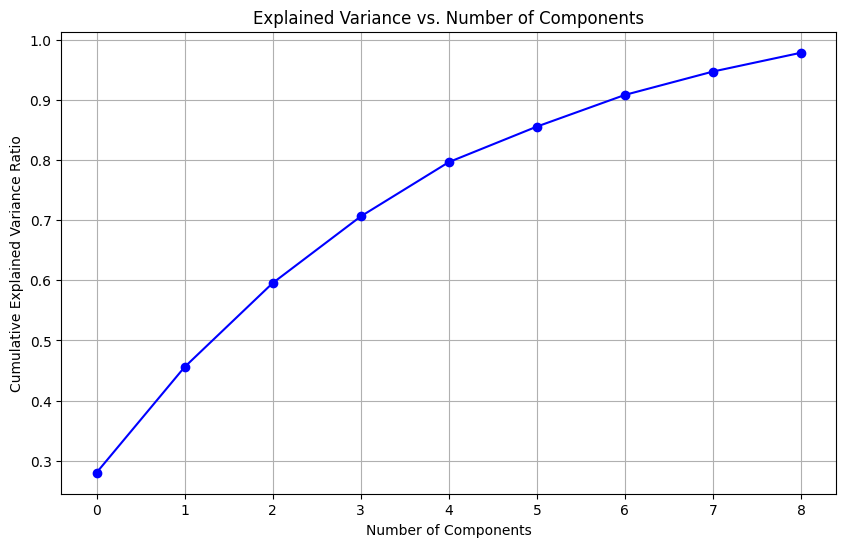

In [18]:
# 1. Create PCA instance
pca = PCA(n_components=0.95)  # Retain 95% of variance

# 2. Fit and transform training data
X_train_pca = pca.fit_transform(X_train_scaled)

# 3. Transform test data
X_test_pca = pca.transform(X_test_scaled)

# 4. Display number of components
print("Number of components selected:", pca.n_components_)

# 5. Plot cumulative explained variance    
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [20]:

# 1. Original data model
model_original = tree.DecisionTreeClassifier(random_state=1)
model_original.fit(X_train_scaled,y_train)
y_pred_original = model_original.predict(X_test)

# 2. PCA data model
model_pca = tree.DecisionTreeClassifier(random_state=1,criterion='log_loss')
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

# 3. Compare results
print("Original Data Accuracy:", accuracy_score(y_test, y_pred_original))
print("PCA Data Accuracy:", accuracy_score(y_test, y_pred_pca))


C:\Users\1212a\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Original Data Accuracy: 0.578125
PCA Data Accuracy: 0.75625
